In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Importing dataset from previous exercise
path=r'C:\Users\aditi\Desktop\Data Analytics_Career Foundry\Data Analytics_Immersion\Project 4\Instacart Basket Analysis'

In [9]:
df_final=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_custs.pkl'))

In [17]:
#  Display all the columns of a DataFrame
pd.options.display.max_columns = None

In [20]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,0.0,10,0,Regularly busy,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Slowest days,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both


# Task 2

I would have removed first and last name, because it is already identifiable by 'user_ID'. But before I would have done this, I would have discussed this step with a colleague to get an opinion if the line of thought is correct. For this exercise, I am not removing any column of information.

# Task 3

In [29]:
# Creating list of states in each region
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

Region column

In [36]:
df_final.loc[df_final['state'].isin(northeast), 'region'] = 'Northeast'
df_final.loc[df_final['state'].isin(midwest), 'region'] = 'Midwest'
df_final.loc[df_final['state'].isin(south), 'region'] = 'South'
df_final.loc[df_final['state'].isin(west), 'region'] = 'West'

In [39]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,0.0,10,0,Regularly busy,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Slowest days,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both,Midwest


Checking region wise frequency

In [43]:
df_final['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# Task 3.2

In [48]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_flag = pd.crosstab(df_final['region'], df_final['spending_flag'], dropna = False)

In [50]:
region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


As it can be seen, population of both high spender and low spender are high in the South region. To compare the number of high and low spenders, I have found the percentage based on population in each region.
Population in South=127,353,282 as in 22.06.2024
High spender in South=0.16%
Low spender in South=8.3%

Population in West=78,602,026 as in 22.06.2024
High spender in West=0.2%
Low spender in West=10.3%

Population in Midwest=68,850,246 as in 22.06.2024
High spender in Midwest=0.2%
Low spender in Midwest=10.8%

Population in Northeast=57,243,423 as in 22.06.2024
High spender in Northeast=0.2%
Low spender in Northeast=9.8%

If we look above, there isn't a much difference in how people are spending in different regions. 

# Task 4

In [63]:
# Exclusion flag based on orders
df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'Exclude'
df_final.loc[df_final['max_order'] >= 5, 'exclusion_flag'] = 'Include'

In [66]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,0.0,10,0,Regularly busy,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both,Midwest,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Slowest days,Mid-range product,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,married,31308,both,Midwest,Exclude


Create sample without 'exclude' rows. This can be called df_final_high_activity based on high activity of customers.


In [71]:
# Check frequencies
df_final['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30964564
Exclude     1440295
Name: count, dtype: int64

In [78]:
df_final_high_activity = df_final[df_final['exclusion_flag'] == 'Include']

In [83]:
df_final_high_activity.shape

(30964564, 33)

Exporting this high customer activity dataset

In [87]:
df_final_high_activity.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_high_activity.pkl'))

# Task 5

In [159]:
df_final_high_activity=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_high_activity.pkl'))

In [161]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Most orders,9,New customer,5.957576,Low spender,19.0,Regular customer,Person,Parks,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include


Profile based on age

In [174]:
df_final_high_activity.loc[df_final_high_activity['age'] <= 30, 'age_group'] = 'Young Adult'
df_final_high_activity.loc[(df_final_high_activity['age'] > 30) & (df_final_high_activity['age'] < 60), 'age_group'] = 'Middle-aged Adult'
df_final_high_activity.loc[df_final_high_activity['age'] >= 60, 'age_group'] = 'Senior'

In [176]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include,Middle-aged Adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Most orders,9,New customer,5.957576,Low spender,19.0,Regular customer,Person,Parks,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include,Young Adult


In [183]:
df_final_high_activity['age_group'].value_counts(dropna = False)

age_group
Middle-aged Adult    14085820
Senior               10574504
Young Adult           6304240
Name: count, dtype: int64

Profile based on income

In [187]:
df_final_high_activity.loc[df_final_high_activity['income'] <= 50000, 'income_group'] = 'Low Income'
df_final_high_activity.loc[(df_final_high_activity['income'] > 50000) & (df_final_high_activity['income'] < 150000), 'income_group'] = 'Mid Income'
df_final_high_activity.loc[df_final_high_activity['income'] >= 150000, 'income_group'] = 'High Income'

In [189]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include,Senior,High Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include,Middle-aged Adult,Mid Income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Most orders,9,New customer,5.957576,Low spender,19.0,Regular customer,Person,Parks,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include,Young Adult,Low Income


In [191]:
df_final_high_activity['income_group'].value_counts(dropna = False)

income_group
Mid Income     23706735
High Income     3895275
Low Income      3362554
Name: count, dtype: int64

Profile based on department_id

In [224]:
df_final_high_activity.loc[df_final_high_activity['department_id']== 18, 'department_group'] = 'Parent'
df_final_high_activity.loc[df_final_high_activity['department_id'].isin([1, 15, 19]), 'department_group'] = 'Quick meals'
df_final_high_activity.loc[df_final_high_activity['department_id'].isin([5,20]), 'department_group'] = 'Lavish'


In [226]:
df_final_high_activity['department_group'].value_counts(dropna = False)

department_group
NaN            23505500
Quick meals     5900211
Lavish          1148461
Parent           410392
Name: count, dtype: int64

Profile based on orders_day_of_week

In [16]:
df_final_high_activity.loc[df_final_high_activity['orders_day_of_week'].isin([0,6]), 'day_group'] = 'Weekend'
df_final_high_activity.loc[df_final_high_activity['orders_day_of_week'].isin([1,2,3,4,5]), 'day_group'] = 'Weekday'

In [236]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,department_group,day_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income,Quick meals,Weekend
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income,Quick meals,Weekend
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include,Senior,High Income,Quick meals,Weekend
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include,Middle-aged Adult,Mid Income,Quick meals,Weekday
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Most orders,9,New customer,5.957576,Low spender,19.0,Regular customer,Person,Parks,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include,Young Adult,Low Income,Quick meals,Weekday


In [242]:
df_final_high_activity['day_group'].value_counts(dropna = False)

day_group
Weekday    20764650
Weekend    10199914
Name: count, dtype: int64

Profile based on order_hour_of_day

In [252]:
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] >= 6) & (df_final_high_activity['order_hour_of_day'] <= 12), 'hour_group'] = 'Morning Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 12) & (df_final_high_activity['order_hour_of_day'] <= 18), 'hour_group'] = 'Afternoon Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 18) & (df_final_high_activity['order_hour_of_day'] <= 22), 'hour_group'] = 'Night Shopper'
df_final_high_activity.loc[df_final_high_activity['order_hour_of_day'] < 6, 'hour_group'] = 'Wee-hours Shopper'
df_final_high_activity.loc[df_final_high_activity['order_hour_of_day'] > 22, 'hour_group'] = 'Wee-hours Shopper'

In [254]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,department_group,day_group,hour_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income,Quick meals,Weekend,Morning Shopper
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Busiest days,Mid-range product,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Senior,Low Income,Quick meals,Weekend,Afternoon Shopper
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest days,Mid-range product,Average orders,5,New customer,7.930208,Low spender,6.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include,Senior,High Income,Quick meals,Weekend,Night Shopper
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include,Middle-aged Adult,Mid Income,Quick meals,Weekday,Morning Shopper
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Most orders,9,New customer,5.957576,Low spender,19.0,Regular customer,Person,Parks,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include,Young Adult,Low Income,Quick meals,Weekday,Afternoon Shopper


In [256]:
df_final_high_activity['hour_group'].value_counts(dropna = False)

hour_group
Afternoon Shopper    13590355
Morning Shopper      12927366
Night Shopper         3494958
Wee-hours Shopper      951885
Name: count, dtype: int64

# Task 6

In [308]:
Age_group_counts = df_final_high_activity['age_group'].value_counts()

Text(0, 0.5, 'Count')

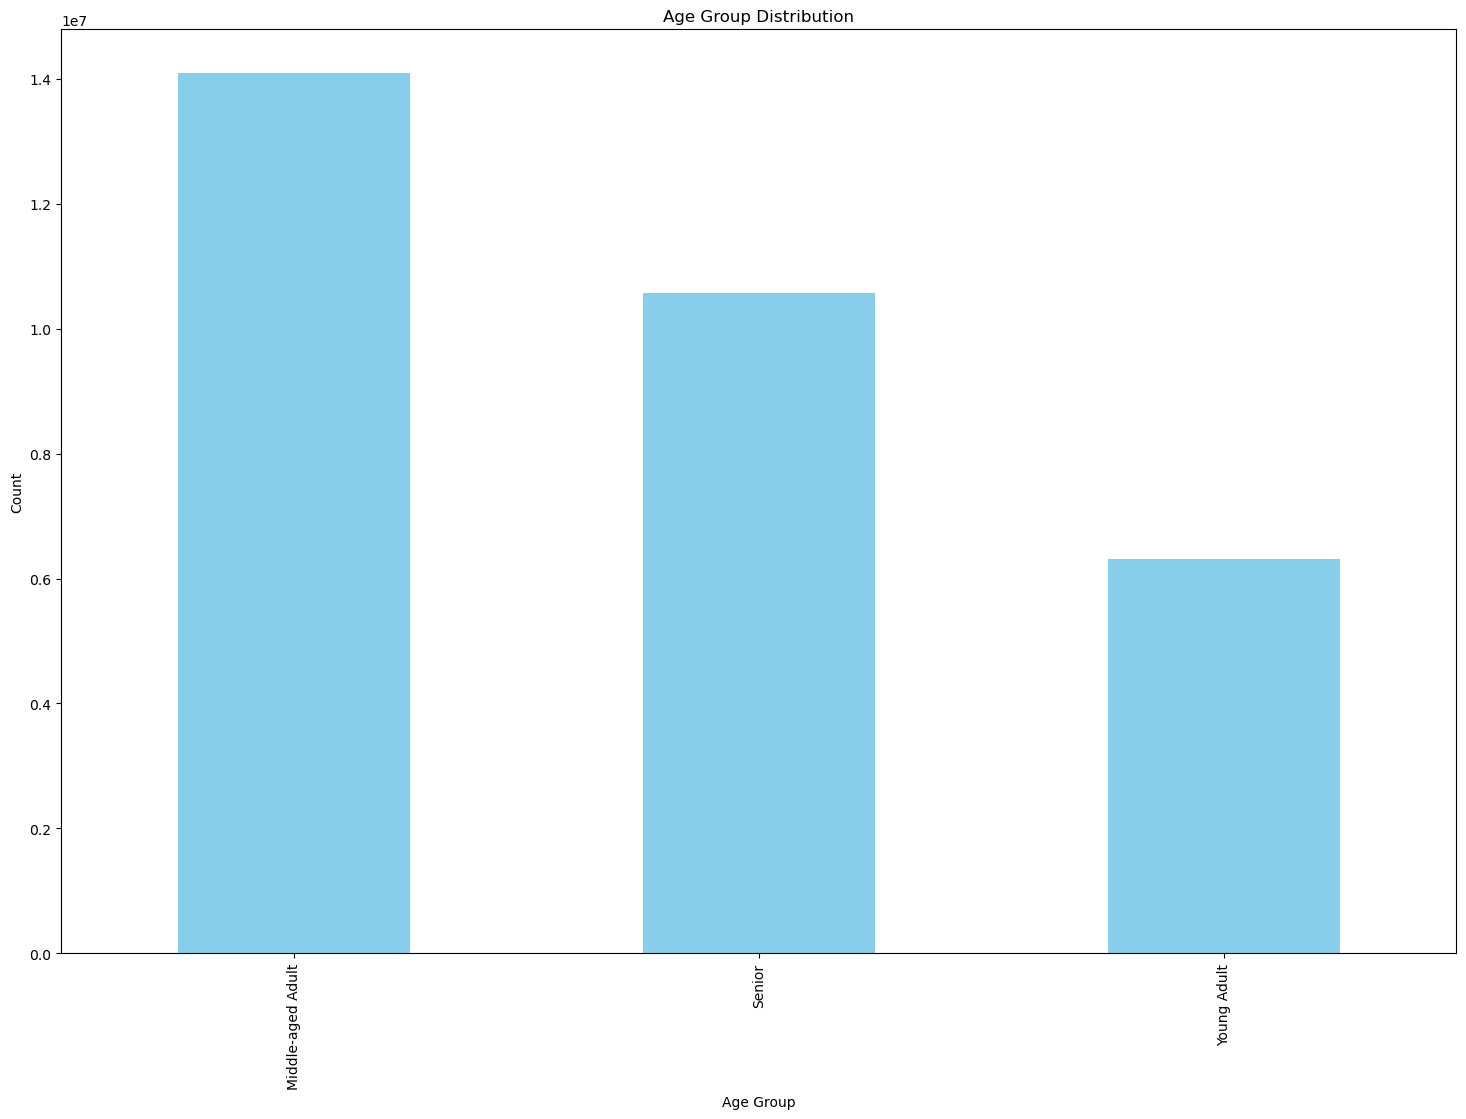

In [335]:
Bar_Age=plt.figure(figsize=(18, 12))
Age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [337]:
Bar_Age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_age.png'))

In [287]:
income_group_counts = df_final_high_activity['income_group'].value_counts()

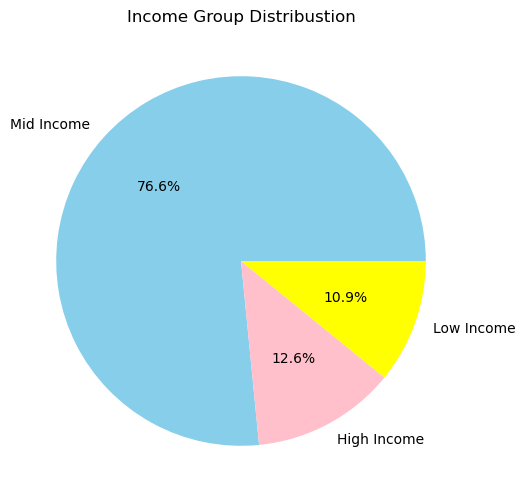

In [349]:
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['skyblue', 'pink', 'yellow'])
plt.title('Income Group Distribustion')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_pie.png'), bbox_inches = 'tight')
plt.show()

In [351]:
Hour_counts = df_final_high_activity['hour_group'].value_counts()

Text(0, 0.5, 'Count')

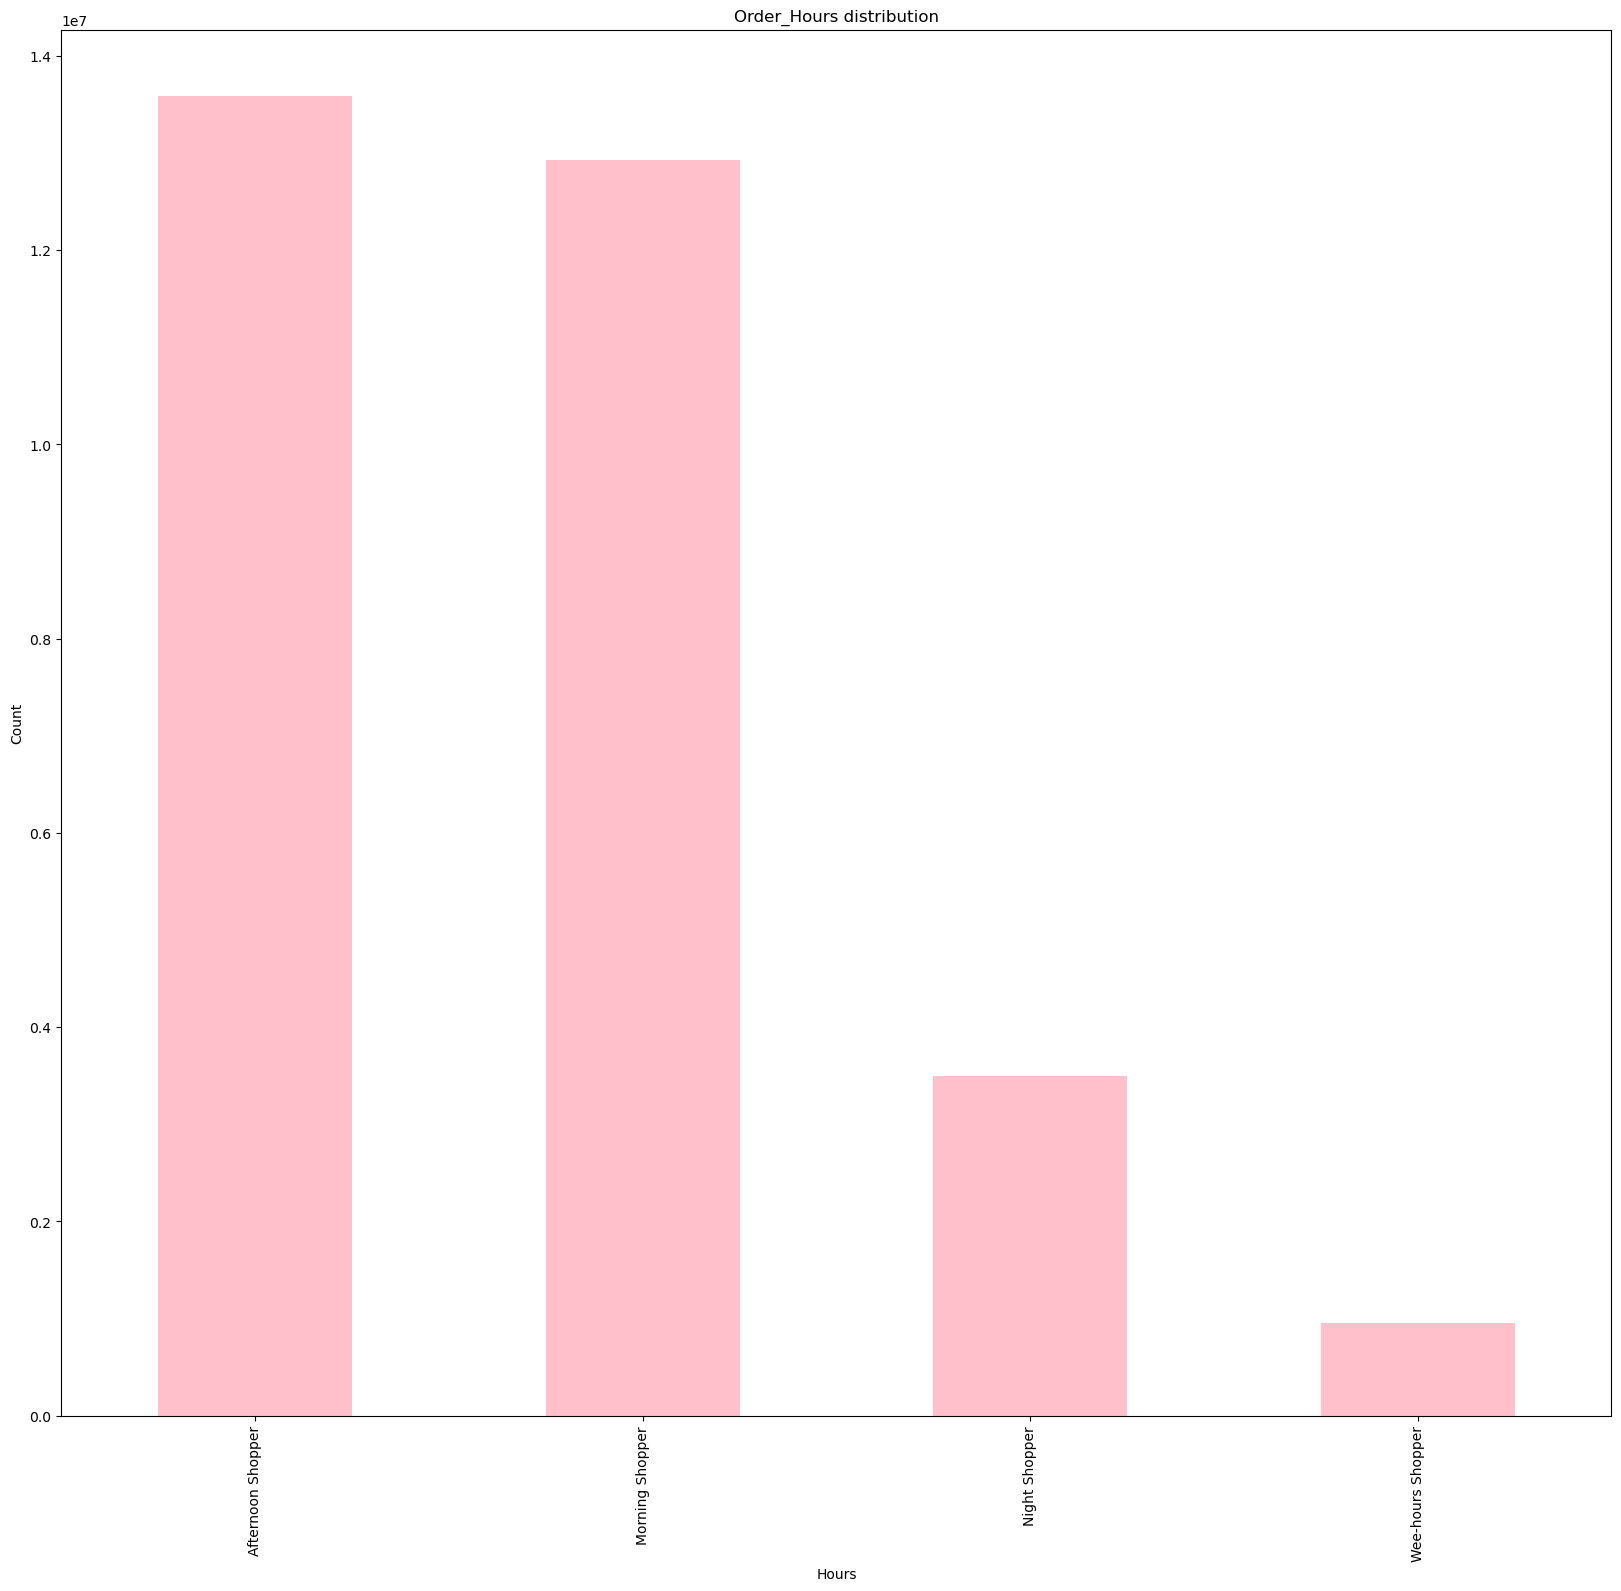

In [357]:
Bar_hour_count=plt.figure(figsize=(20, 18))
Hour_counts.plot(kind='bar', color='pink')
plt.title('Order_Hours distribution')
plt.xlabel('Hours')
plt.ylabel('Count')

In [359]:
Bar_hour_count.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Bar_hour_count.png'))

In [18]:
df_final_high_activity.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_high_activity_new.pkl'))

In [22]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,marital_status,income,_merge,region,exclusion_flag,day_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Weekend
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,married,49620,both,Midwest,Include,Weekend
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,married,158302,both,Northeast,Include,Weekend
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Female,Hawaii,51,1/4/2019,married,57797,both,West,Include,Weekday
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Male,District of Columbia,20,5/8/2019,living with parents and siblings,34171,both,South,Include,Weekday


In [24]:
df_final_high_activity.shape

(30964564, 34)

In [26]:
df_final_high_activity.loc[df_final_high_activity['age'] <= 30, 'age_group'] = 'Young Adult'
df_final_high_activity.loc[(df_final_high_activity['age'] > 30) & (df_final_high_activity['age'] < 60), 'age_group'] = 'Middle-aged Adult'
df_final_high_activity.loc[df_final_high_activity['age'] >= 60, 'age_group'] = 'Senior'

In [28]:
df_final_high_activity.loc[df_final_high_activity['income'] <= 50000, 'income_group'] = 'Low Income'
df_final_high_activity.loc[(df_final_high_activity['income'] > 50000) & (df_final_high_activity['income'] < 150000), 'income_group'] = 'Mid Income'
df_final_high_activity.loc[df_final_high_activity['income'] >= 150000, 'income_group'] = 'High Income'

In [30]:
df_final_high_activity.loc[df_final_high_activity['department_id']== 18, 'department_group'] = 'Parent'
df_final_high_activity.loc[df_final_high_activity['department_id'].isin([1, 15, 19]), 'department_group'] = 'Quick meals'
df_final_high_activity.loc[df_final_high_activity['department_id'].isin([5,20]), 'department_group'] = 'Lavish'


In [32]:
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] >= 6) & (df_final_high_activity['order_hour_of_day'] <= 12), 'hour_group'] = 'Morning Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 12) & (df_final_high_activity['order_hour_of_day'] <= 18), 'hour_group'] = 'Afternoon Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 18) & (df_final_high_activity['order_hour_of_day'] <= 22), 'hour_group'] = 'Night Shopper'
df_final_high_activity.loc[df_final_high_activity['order_hour_of_day'] < 6, 'hour_group'] = 'Wee-hours Shopper'
df_final_high_activity.loc[df_final_high_activity['order_hour_of_day'] > 22, 'hour_group'] = 'Wee-hours Shopper'

In [34]:
df_final_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Morning Shopper
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Afternoon Shopper
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,married,158302,both,Northeast,Include,Weekend,Senior,High Income,Quick meals,Night Shopper
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,both,West,Include,Weekday,Middle-aged Adult,Mid Income,Quick meals,Morning Shopper
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,both,South,Include,Weekday,Young Adult,Low Income,Quick meals,Afternoon Shopper


In [36]:
df_final_high_activity.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_high_activity_new.pkl'))

In [38]:
df_final_dataset=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_high_activity_new.pkl'))

In [40]:
df_final_dataset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Morning Shopper
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Afternoon Shopper
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,married,158302,both,Northeast,Include,Weekend,Senior,High Income,Quick meals,Night Shopper
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,both,West,Include,Weekday,Middle-aged Adult,Mid Income,Quick meals,Morning Shopper
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,both,South,Include,Weekday,Young Adult,Low Income,Quick meals,Afternoon Shopper


# Task 7

In [62]:
df_final_dataset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Morning Shopper
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Afternoon Shopper
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,married,158302,both,Northeast,Include,Weekend,Senior,High Income,Quick meals,Night Shopper
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,both,West,Include,Weekday,Middle-aged Adult,Mid Income,Quick meals,Morning Shopper
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,both,South,Include,Weekday,Young Adult,Low Income,Quick meals,Afternoon Shopper


In [77]:
# Creating subset
df_final_subset = df_final_dataset.groupby(['user_id', 'age_group', 'income_group', 'hour_group', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [80]:
df_final_subset.head()

,user_id,age_group,income_group,hour_group,loyalty_flag,region,order_number,days_since_prior_order,prices
0,1,Middle-aged Adult,Low Income,Afternoon Shopper,New customer,South,5,28.0,57.0
1,1,Middle-aged Adult,Low Income,Afternoon Shopper,New customer,South,8,14.0,40.2
2,1,Middle-aged Adult,Low Income,Afternoon Shopper,New customer,South,9,0.0,40.2
3,1,Middle-aged Adult,Low Income,Morning Shopper,New customer,South,1,0.0,31.6
4,1,Middle-aged Adult,Low Income,Morning Shopper,New customer,South,2,15.0,35.4


In [83]:
aggregations_age = df_final_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [85]:
aggregations_age

days_since_prior_order                 prices              \
                                     min      mean   max    min        mean   
age_group                                                                     
Middle-aged Adult                    0.0  9.820803  30.0    1.0  121.469913   
Senior                               0.0  9.834277  30.0    1.0  118.087213   
Young Adult                          0.0  9.865924  30.0    1.0  122.821807   

                             
                        max  
age_group                    
Middle-aged Adult  100442.8  
Senior             100452.9  
Young Adult        100311.3

# "Prices" have not correctly been converted. The maximum prices is "100452.9" and seems incorrect. This needs to be addressed.

In [101]:
filtered_df = df_final_dataset[(df_final_dataset['prices'] >= 50)]

In [103]:
filtered_df.to_csv(os.path.join(path, 'Data', 'Original data', 'df_final_high_activity_filtered.csv'))

In [111]:
filtered_df.loc[filtered_df['prices'] == 14900, 'prices'] = 1.49
filtered_df.loc[filtered_df['prices'] == 99999, 'prices'] = 0.99

In [113]:
filtered_df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group
21786183,33664.0,2 % Reduced Fat Milk,84,16,0.99,183964.0,873,3,0,10,...,married,290220,both,West,Include,Weekend,Senior,High Income,NaN,Morning Shopper
21786184,33664.0,2 % Reduced Fat Milk,84,16,0.99,1851256.0,873,4,6,12,...,married,290220,both,West,Include,Weekend,Senior,High Income,NaN,Morning Shopper
21786185,33664.0,2 % Reduced Fat Milk,84,16,0.99,1915696.0,1893,1,5,17,...,married,348829,both,West,Include,Weekday,Young Adult,High Income,NaN,Afternoon Shopper
21786186,33664.0,2 % Reduced Fat Milk,84,16,0.99,2763293.0,1893,2,4,16,...,married,348829,both,West,Include,Weekday,Young Adult,High Income,NaN,Afternoon Shopper
21786187,33664.0,2 % Reduced Fat Milk,84,16,0.99,2564805.0,1893,4,1,17,...,married,348829,both,West,Include,Weekday,Young Adult,High Income,NaN,Afternoon Shopper


In [115]:
df_final_dataset.loc[df_final_dataset['prices'] == 14900, 'prices'] = 1.49
df_final_dataset.loc[df_final_dataset['prices'] == 99999, 'prices'] = 0.99

In [141]:
df_final_dataset.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,age,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,2.559849e+04,7.118859e+01,9.922365e+00,7.789587e+00,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.023032e+01,8.363038e+00,6.061019e-01,3.442569e+01,1.193352e+01,9.337764e+00,4.946803e+01,9.967587e+04
std,1.408097e+04,3.822194e+01,6.282441e+00,4.241015e+00,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.693523e+00,7.135399e+00,4.886127e-01,2.489504e+01,7.992284e+01,6.077206e+00,1.848528e+01,4.314187e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,1.490000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,6.729200e+04
50%,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,9.676500e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.249596e+00,1.100000e+01,6.500000e+01,1.281020e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,5.939010e+05


In [125]:
# Creating subset
df_final_subset = df_final_dataset.groupby(['user_id', 'age_group', 'income_group', 'hour_group', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [127]:
aggregations_age = df_final_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [129]:
aggregations_age

days_since_prior_order                 prices             \
                                     min      mean   max    min       mean   
age_group                                                                    
Middle-aged Adult                    0.0  9.820803  30.0   0.99  78.699519   
Senior                               0.0  9.834277  30.0   0.99  78.504789   
Young Adult                          0.0  9.865924  30.0   1.00  79.087764   

                           
                      max  
age_group                  
Middle-aged Adult  1092.2  
Senior              875.0  
Young Adult         842.1

In [131]:
aggregations_income = df_final_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [133]:
aggregations_income

days_since_prior_order                  prices                   
                                min       mean   max    min       mean     max
income_group                                                                  
High Income                     0.0   9.620919  30.0   0.99  83.774782  1047.4
Low Income                      0.0  10.419667  30.0   1.00  52.629435   875.0
Mid Income                      0.0   9.758708  30.0   0.99  82.817905  1092.2

In [135]:
aggregations_hour = df_final_subset.groupby('hour_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [137]:
aggregations_hour

days_since_prior_order                  prices             \
                                     min       mean   max    min       mean   
hour_group                                                                    
Afternoon Shopper                    0.0   9.930512  30.0   0.99  77.800420   
Morning Shopper                      0.0   9.778053  30.0   0.99  79.333847   
Night Shopper                        0.0   9.563618  30.0   1.00  79.494466   
Wee-hours Shopper                    0.0  10.200597  30.0   1.00  80.715253   

                           
                      max  
hour_group                 
Afternoon Shopper   852.5  
Morning Shopper    1092.2  
Night Shopper       780.8  
Wee-hours Shopper   875.0

In [143]:
df_final_dataset.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_dataset.pkl'))

In [145]:
df_final_dataset=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_dataset.pkl'))

In [147]:
df_final_dataset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group
0,1.0,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138,28,6,11,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Morning Shopper
1,1.0,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138,30,6,17,...,married,49620,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Afternoon Shopper
2,1.0,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709,2,0,21,...,married,158302,both,Northeast,Include,Weekend,Senior,High Income,Quick meals,Night Shopper
5,1.0,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777,16,1,7,...,married,57797,both,West,Include,Weekday,Middle-aged Adult,Mid Income,Quick meals,Morning Shopper
6,1.0,Chocolate Sandwich Cookies,61,19,5.8,1871483.0,825,3,2,14,...,living with parents and siblings,34171,both,South,Include,Weekday,Young Adult,Low Income,Quick meals,Afternoon Shopper


In [149]:
df_final_dataset.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,age,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,2.559849e+04,7.118859e+01,9.922365e+00,7.789587e+00,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.023032e+01,8.363038e+00,6.061019e-01,3.442569e+01,1.193352e+01,9.337764e+00,4.946803e+01,9.967587e+04
std,1.408097e+04,3.822194e+01,6.282441e+00,4.241015e+00,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.693523e+00,7.135399e+00,4.886127e-01,2.489504e+01,7.992284e+01,6.077206e+00,1.848528e+01,4.314187e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,1.490000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,6.729200e+04
50%,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,9.676500e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.249596e+00,1.100000e+01,6.500000e+01,1.281020e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,5.939010e+05


# Task 8

In [155]:
# Creating crosstab for region and age group

age_region = pd.crosstab(df_final_dataset['region'], df_final_dataset['age_group'], dropna = False)

In [157]:
age_region

age_group,Middle-aged Adult,Senior,Young Adult
region,,,
Midwest,3345023,2455443,1461047
Northeast,2468980,1884229,1111476
South,4662816,3521421,2126902
West,3609001,2713411,1604815


In [165]:
# Creating crosstab for region and income group

income_region = pd.crosstab(df_final_dataset['region'], df_final_dataset['income_group'], dropna = False)

In [167]:
income_region

income_group,High Income,Low Income,Mid Income
region,,,
Midwest,917495,783764,5560254
Northeast,677730,587137,4199818
South,1290460,1142572,7878107
West,1009590,849081,6068556


In [170]:
df_final_dataset.dtypes

product_id                     float64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
order_id                       float64
user_id                         object
order_number                     int64
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
busiest_days                    object
price_range_loc                 object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
first_name                      object
last_name                       object
gender                          object
state                    

In [172]:
df_departments=pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'departments_wrangled.csv'))

In [174]:
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [183]:
df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [185]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [187]:
df_departments.dtypes

department_id     int64
department       object
dtype: object

Merging departments with department_ids

In [219]:
# Creating subset
df_final_subset_2 = df_final_dataset[['user_id','region', 'department_id']]

MemoryError: Unable to allocate 472. MiB for an array with shape (2, 30964564) and data type object